In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [7]:
df=pd.read_csv("/Users/songmingxuan/Downloads/data_assignment1_2023.csv",index_col=0)
df

,date,gdp,ir,cpi
1,1970-01-01,1.911374,9.920000,5.526357
2,1970-04-01,1.262038,9.186666,5.437259
3,1970-07-01,1.377239,8.673333,5.275131
4,1970-10-01,1.570186,7.920000,4.971684
5,1971-01-01,0.129083,6.376667,4.854039
...,...,...,...,...
196,2018-10-01,0.583801,-0.315333,1.896263
197,2019-01-01,0.676134,-0.308533,1.221344
198,2019-04-01,0.687793,-0.317100,1.123850
199,2019-07-01,0.021201,-0.396733,1.004443


## a

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


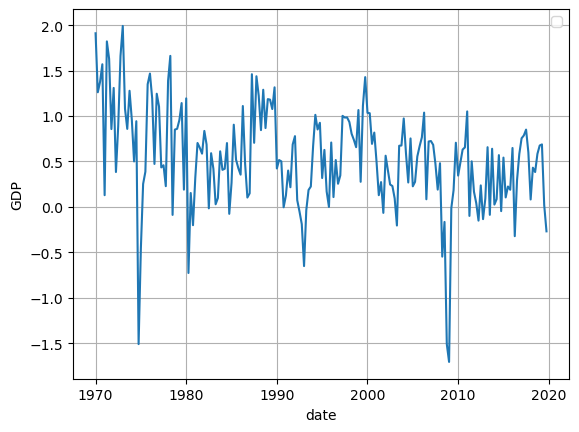

In [16]:
plt.plot(pd.to_datetime(df.date),df.gdp)
plt.legend()
plt.xlabel('date')
plt.ylabel("GDP")
plt.grid()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


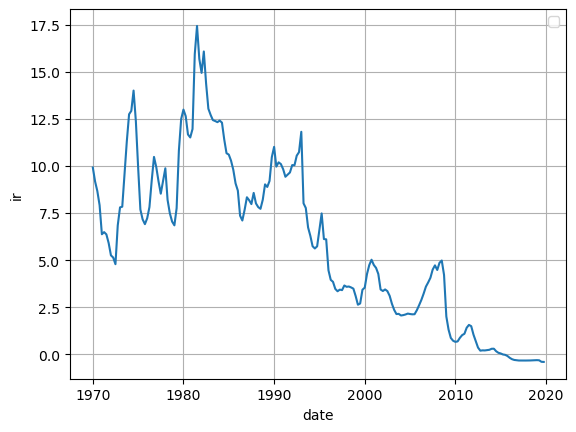

In [17]:
plt.plot(pd.to_datetime(df.date),df.ir)
plt.legend()
plt.xlabel('date')
plt.ylabel("ir")
plt.grid()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


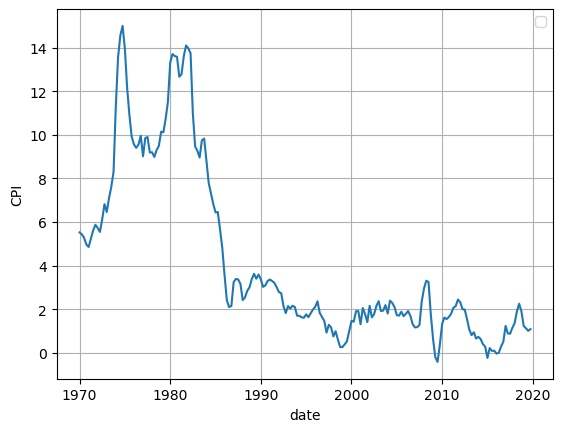

In [19]:
plt.plot(pd.to_datetime(df.date),df.cpi)
plt.legend()
plt.xlabel('date')
plt.ylabel("CPI")
plt.grid()

## b,c

### VAR(3)

In [81]:
Y=df[['gdp','cpi']]
mY_3=Y[3:]
mY_3=mY_3.T
mY_3

,4,5,6,7,8,9,10,11,12,13,...,191,192,193,194,195,196,197,198,199,200
gdp,1.570186,0.129083,1.821987,1.630601,0.856781,1.309796,0.384177,0.887960,1.660236,1.992282,...,0.851057,0.599843,0.081844,0.431768,0.383905,0.583801,0.676134,0.687793,0.021201,-0.268869
cpi,4.971684,4.854039,5.231388,5.610890,5.874631,5.730010,5.544933,6.130148,6.819591,6.460502,...,0.869941,1.141454,1.360432,1.895423,2.248264,1.896263,1.221344,1.123850,1.004443,1.085032


In [82]:
mZ_3=np.zeros(shape=(7,197))
for i in range(197):
    mZ_3[:,i]=np.array([1,Y.gdp[i+3],Y.cpi[i+3],Y.gdp[i+2],Y.cpi[i+2],Y.gdp[i+1],Y.cpi[i+1]]).T

In [83]:
B_3=(mY_3@mZ_3.T)@np.linalg.inv(mZ_3@mZ_3.T)
B_3=B_3.values
B_3

array([[ 0.17992679,  0.33532806,  0.00565215,  0.18924561, -0.14825444,
         0.09092151,  0.14487113],
       [-0.0817275 ,  0.15862782,  1.4377946 ,  0.07449374, -0.4883013 ,
         0.04303951,  0.03214537]])

In [94]:
uhat_3=mY_3-(B_3@mZ_3)
sigma_hat_ML_3=(uhat_3@uhat_3.T)/197

In [98]:
AIC_3=np.log(np.linalg.det(sigma_hat_ML_3))+(2*(3*4+2))/197
AIC_3

-2.712890338920279

In [100]:
SC_3=np.log(np.linalg.det(sigma_hat_ML_3))+(np.log(197)*(3*4+2))/197
SC_3

-2.4795662160658027

In [101]:
HQ_3=np.log(np.linalg.det(sigma_hat_ML_3))+(2*np.log(np.log(197))*(3*4+2))/197
HQ_3

-2.61843899346622

### VAR(2)

In [85]:
mY_2=mY_3
mZ_2 = np.zeros(shape=(5, 197))
for i in range(197):
    mZ_2[:, i] = np.array([1, Y.gdp[i + 2], Y.cpi[i + 2], Y.gdp[i + 1], Y.cpi[i + 1]]).T
B_2 = (mY_2 @ mZ_2.T) @ np.linalg.inv(mZ_2 @ mZ_2.T)
B_2 = B_2.values
B_2

array([[ 0.25162806,  0.30988432, -0.1592275 ,  0.16584153,  0.16149625],
       [-0.14667104,  0.37644474,  1.55858793,  0.18996424, -0.60313251]])

In [102]:
uhat_2 = mY_2 - (B_2 @ mZ_2)
sigma_hat_ML_2 = (uhat_2 @ uhat_2.T) / 197


In [103]:
AIC_2 = np.log(np.linalg.det(sigma_hat_ML_2)) + (2 * (2 * 4 + 2)) / 197

SC_2 = np.log(np.linalg.det(sigma_hat_ML_2)) + (np.log(197) * (2 * 4 + 2)) / 197

HQ_2 = np.log(np.linalg.det(sigma_hat_ML_2)) + (2 * np.log(np.log(197)) * (2 * 4 + 2)) / 197
AIC_2,SC_2,HQ_2

(-1.5068267605388805, -1.3401666727856831, -1.4393615137859812)

### VAR(1)

In [86]:
mY_1=mY_2
mZ_1 = np.zeros(shape=(3, 197))
for i in range(197):
    mZ_1[:, i] = np.array([1, Y.gdp[i + 1], Y.cpi[i + 1]]).T
B_1 = (mY_1 @ mZ_1.T) @ np.linalg.inv(mZ_1 @ mZ_1.T)
B_1 = B_1.values
B_1

array([[ 0.35799571,  0.26223772,  0.00481857],
       [-0.22415956,  0.79318982,  0.93601303]])

In [104]:
uhat_1 = mY_1 - (B_1 @ mZ_1)
sigma_hat_ML_1 = (uhat_1 @ uhat_1.T) / 197


In [105]:
AIC_1 = np.log(np.linalg.det(sigma_hat_ML_1)) + (1 * (2 * 4 + 2)) / 197

SC_1 = np.log(np.linalg.det(sigma_hat_ML_1)) + (np.log(197) * (1 * 4 + 2)) / 197

HQ_1 = np.log(np.linalg.det(sigma_hat_ML_1)) + (2 * np.log(np.log(197)) * (1 * 4 + 2)) / 197
AIC_1, SC_1, HQ_1

(-0.7073195646944302, -0.5971712277785525, -0.6566881323787312)